In [2]:
# Importing Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
% matplotlib inline

In [11]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 1AF3-21EB

 Directory of C:\Users\devar\Downloads\pycbit-assignments-master\pycbit-assignments-master

05/26/2018  12:02 PM    <DIR>          .
05/26/2018  12:02 PM    <DIR>          ..
05/25/2018  12:24 AM                30 .gitignore
05/25/2018  06:06 PM    <DIR>          .ipynb_checkpoints
05/26/2018  12:02 PM            88,977 1 Titanic Data Analysis.ipynb
05/25/2018  12:24 AM            21,767 2 US Facility-Level Air Pollution.ipynb
05/25/2018  12:24 AM             2,040 3 Indian Premier League (Cricket).ipynb
05/25/2018  12:24 AM    <DIR>          datasets
05/25/2018  12:24 AM               380 README.md
               5 File(s)        113,194 bytes
               4 Dir(s)  69,275,652,096 bytes free


In [3]:
# Read Dataset
df = pd.read_csv("datasets/titanic.csv")

In [4]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [56]:
# Printing first five tuples
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [57]:
# Stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Container object of 2 artists>

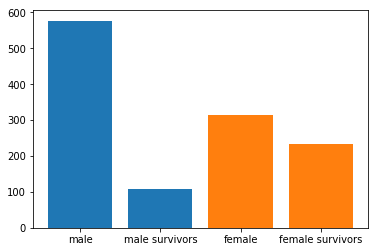

In [61]:
x = ["male", "male survivors"]
survivors = df[ (df["Survived"] == 1) ]
y = [list(df["Sex"]).count("male"), list(survivors["Sex"]).count("male")]

plt.bar(x, y)

x = ["female", "female survivors"]
y = [list(df["Sex"]).count("female"), list(survivors["Sex"]).count("female")]

plt.bar(x, y)





{'C': 168, 'Q': 77, 'S': 644}


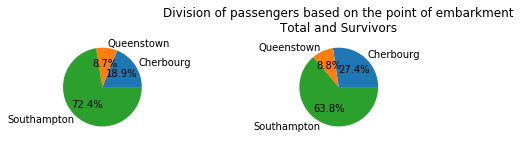

In [7]:
from matplotlib.gridspec import GridSpec

pointsOfEmbarkment = ["Cherbourg","Queenstown", "Southampton"]
groups = (df.groupby("Embarked"))
d = (dict(groups["Survived"].agg(np.size)))
print(d)
the_grid = GridSpec(1, 3)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(d.values(), labels = pointsOfEmbarkment, autopct='%1.1f%%')


survivors = df[df["Survived"] == 1].groupby("Embarked")

d1 = (dict(survivors["Name"].agg(np.size)))
#print(d1)
plt.subplot(the_grid[0,2], aspect = 1)
plt.pie(d1.values(), labels = pointsOfEmbarkment, autopct='%1.1f%%')
plt.title("Division of passengers based on the point of embarkment\nTotal and Survivors")
plt.show()



c:\users\devar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,AgeRange,PercentageofSurvival
0,1,40
1,2,35
2,3,43
3,4,38
4,5,41


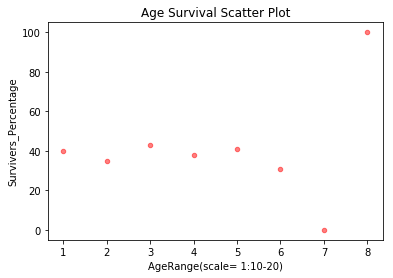

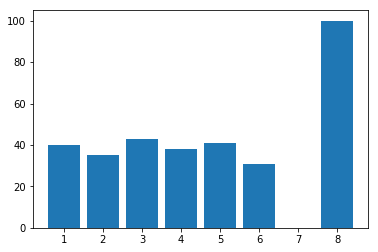

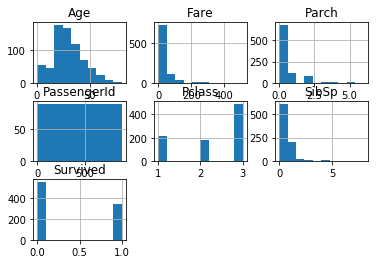

In [12]:
survivers_count=[0,0,0,0,0,0,0,0]

for i in range(0,8):

	survivers_count[i] = int((df[df.Age>=((i+1)*10)][df.Age<(i+2)*10][df.Survived==1].PassengerId.count()/df[df.Age>=((i+1)*10)][df.Age<((i+2)*10)].PassengerId.count())*100)



#craete a dictionary so that it can be converted to dataframe

dict1={'AgeRange':[1,2,3,4,5,6,7,8],'PercentageofSurvival': survivers_count}

data_res=pd.DataFrame(data=dict1)

print("\n\n\n")



#display sample rows of new dataframe

display(data_res.head())



#scatter plot created

data_res.plot(kind='scatter', x='AgeRange', y='PercentageofSurvival',alpha = 0.5,color = 'red')

plt.xlabel('AgeRange(scale= 1:10-20)')  

plt.ylabel('Survivers_Percentage')

plt.title('Age Survival Scatter Plot')

plt.show()



plt.bar(dict1['AgeRange'],dict1['PercentageofSurvival'])

plt.show()

df.hist()

plt.show()